In [1]:
# for tables and plots
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# for the machine learning part
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# upload the csv from my computer
print("Upload your Advertising.csv file...")
uploaded = files.upload()

# read the file with pandas
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

print("File is ready to use.")

Upload your Advertising.csv file...


Saving Advertising.csv to Advertising.csv
File is ready to use.


In [3]:
# print first 5 lines
print("Top 5 rows:")
print(df.head())

# checking columns and if anything is null
print("\nData info:")
df.info()

Top 5 rows:
   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
# that 'Unnamed: 0' is not useful, dropping it
df = df.drop('Unnamed: 0', axis=1)

print("\nCleaned the extra column.")
print("New first 5 rows:")
print(df.head()) # checking again after dropping


Cleaned the extra column.
New first 5 rows:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


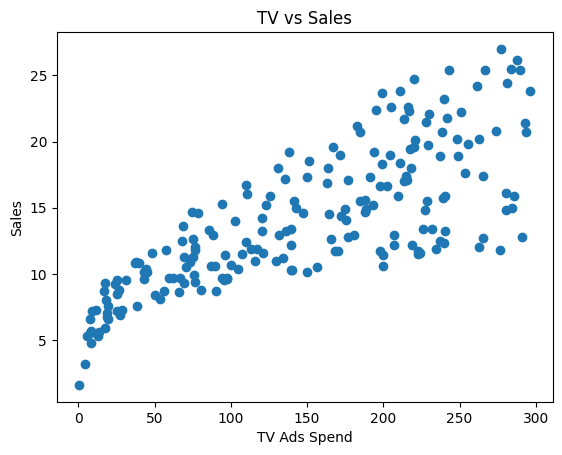

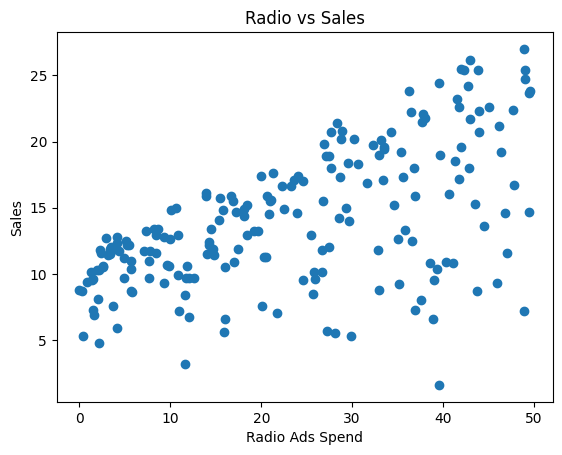

In [5]:
# TV vs Sales
plt.scatter(df['TV'], df['Sales'])
plt.xlabel("TV Ads Spend")
plt.ylabel("Sales")
plt.title("TV vs Sales")
plt.show()

# Radio vs Sales
plt.scatter(df['Radio'], df['Sales'])
plt.xlabel("Radio Ads Spend")
plt.ylabel("Sales")
plt.title("Radio vs Sales")
plt.show()

In [6]:
# My features are the money spent on ads
X = df[['TV', 'Radio', 'Newspaper']]

# My target is the 'Sales'
y = df['Sales']

print("X and y are ready.")

X and y are ready.


In [7]:
# splitting data, 70% for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# just to be sure about the size
print("\nShape of training data:", X_train.shape)
print("Shape of testing data:", X_test.shape)


Shape of training data: (140, 3)
Shape of testing data: (60, 3)


In [8]:
# creating a linear regression model
my_lin_model = LinearRegression()

# training the model on my training data (this is where it learns)
my_lin_model.fit(X_train, y_train)

print("\nModel is created and trained!")


Model is created and trained!


In [9]:
# making predictions on the test set
test_predictions = my_lin_model.predict(X_test)

print("Predictions have been made on the test data.")

Predictions have been made on the test data.



R-squared score: 0.92
(A score closer to 1 is better)


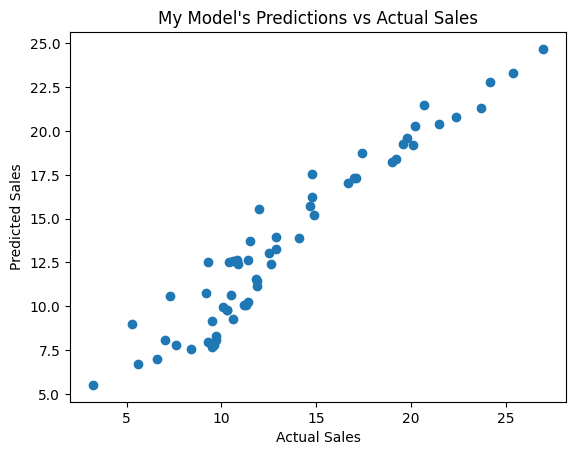

In [10]:
# check how good the model is using R-squared
r2 = metrics.r2_score(y_test, test_predictions)
print(f"\nR-squared score: {r2:.2f}")
print("(A score closer to 1 is better)")

# plot my predictions vs the actual values to see it visually
plt.scatter(y_test, test_predictions)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("My Model's Predictions vs Actual Sales")
plt.show()